In [1]:
# The model was implemented by passing a list as input.
# The program implements Gaussian Mixture Model from the sklearn library.
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import re
from numpy import array

# Data Pre Processing
# The data is being read from a txt file and is eventually been shaped up in the correct format.
# The list is eventually fed to the model.
with open("C://Dr. Bhandarkar- Directed Study//nounVectorsFastext.txt",'r') as myfile:
    tempdata=myfile.read()
opbrack=[]
closebrack=[]
for i in range(0,tempdata.__len__()):
    if tempdata[i]=='[':
        opbrack.append(i)
    if tempdata[i]==']':
        closebrack.append(i)
    
count=0
data=[]
while count<opbrack.__len__():
    data.append(tempdata[opbrack[count]+1:closebrack[count]])
    count=count+1

count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==" ":
            temp=temp.replace(temp[counter],"")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==",":
            temp=temp.replace(temp[counter]," ")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0

# The list with word vectors
X=[]
while count<data.__len__():
    temp=data[count]
    floats = [float(x) for x in temp.split()]
    X.append(floats)
    count=count+1
x=X[0]
X=np.array(X)

# Contains only the names of the word vectors like 'person','tabl' etc.
names=[] 
str=tempdata.split(']')
for i in range(0,len(str)-1):
    a = re.findall(r'\w+', str[i])
    names.append(a[0])


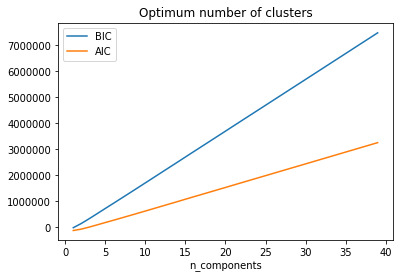

In [3]:
#Fitting the model
gmm=GaussianMixture(n_components=11).fit(X)

# Trying to find out the optimal number of clusters
# BIC - Bayesian Information Criterion
# AIC - Akaike Information Criterion
n_components=np.arange(1,40)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('Optimum number of clusters')
plt.savefig('BIC AIC method')


In [7]:
#Predicting the labels of the clusters
labels = gmm.predict(X)

#Printing the corresponding names of the word vectors
clust=[]
clusternames=[]
listofl=[]
for i in range(0,11):
    arr=list(np.where(labels==i))
    clust.append(arr)
for i in range(0,len(clust)):
    temp=clust[i]
    for k in range(0,len(clust[i])):
        clusternames=[]
        for l in range(0,len(clust[i][k])):
            clusternames.append(names[clust[i][k][l]])
        listofl.append(clusternames)
# print(listofl)


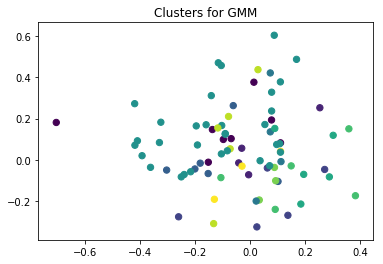

In [5]:
#plotting the clusters
plt.title('Clusters for GMM')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.savefig('GMM clusters')

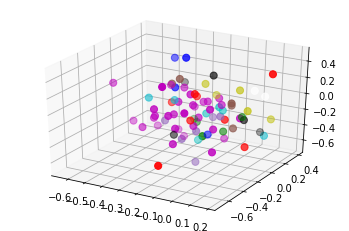

In [6]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
# labels = kmeans.labels_ 
Label_Map = {0:'r',1:'b',2:'g',3:'tab:purple',4:'c',5:'m',6:'y',7:'k',8:'w',9:'tab:brown',10:'tab:cyan'}
label_color = [Label_Map[l] for l in labels]
ax=plt.axes(projection ='3d')
ax.scatter(X[:,3],X[:,0],X[:,2] , c=label_color, s=50)

plt.show()